In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
color = sns.color_palette()

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

auto-mpg.csv



Let's take a look at the dataset first

In [2]:
data = pd.read_csv('../input/auto-mpg.csv')
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
# Check the type of data values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null int64
acceleration    398 non-null float64
model year      398 non-null int64
origin          398 non-null int64
car name        398 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [4]:
# How many different types of cars are there?
unique_cars = set(data['car name'].values)
print(len(unique_cars))

305


So multiple data values are available for some cars as the number of unique cars is 305 while there are 398 entries

In [5]:
# Check for duplicates
data[data.duplicated()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name


No duplicates are found in the data which is a good thing. 

In [6]:
# There are NaN values in the horespower column which are represented by `?` due to which it is of object type
# Replace the NaN values with the min horsepower value 
horse_power_values = [int(val) for val in data['horsepower'].values if val!='?']
min_horsepower = min(horse_power_values)
print("Minimum horsepower value : ", min_horsepower)

data['horsepower'] = data['horsepower'].apply(lambda x : int(x) if x!='?' else min_horsepower)

Minimum horsepower value :  46


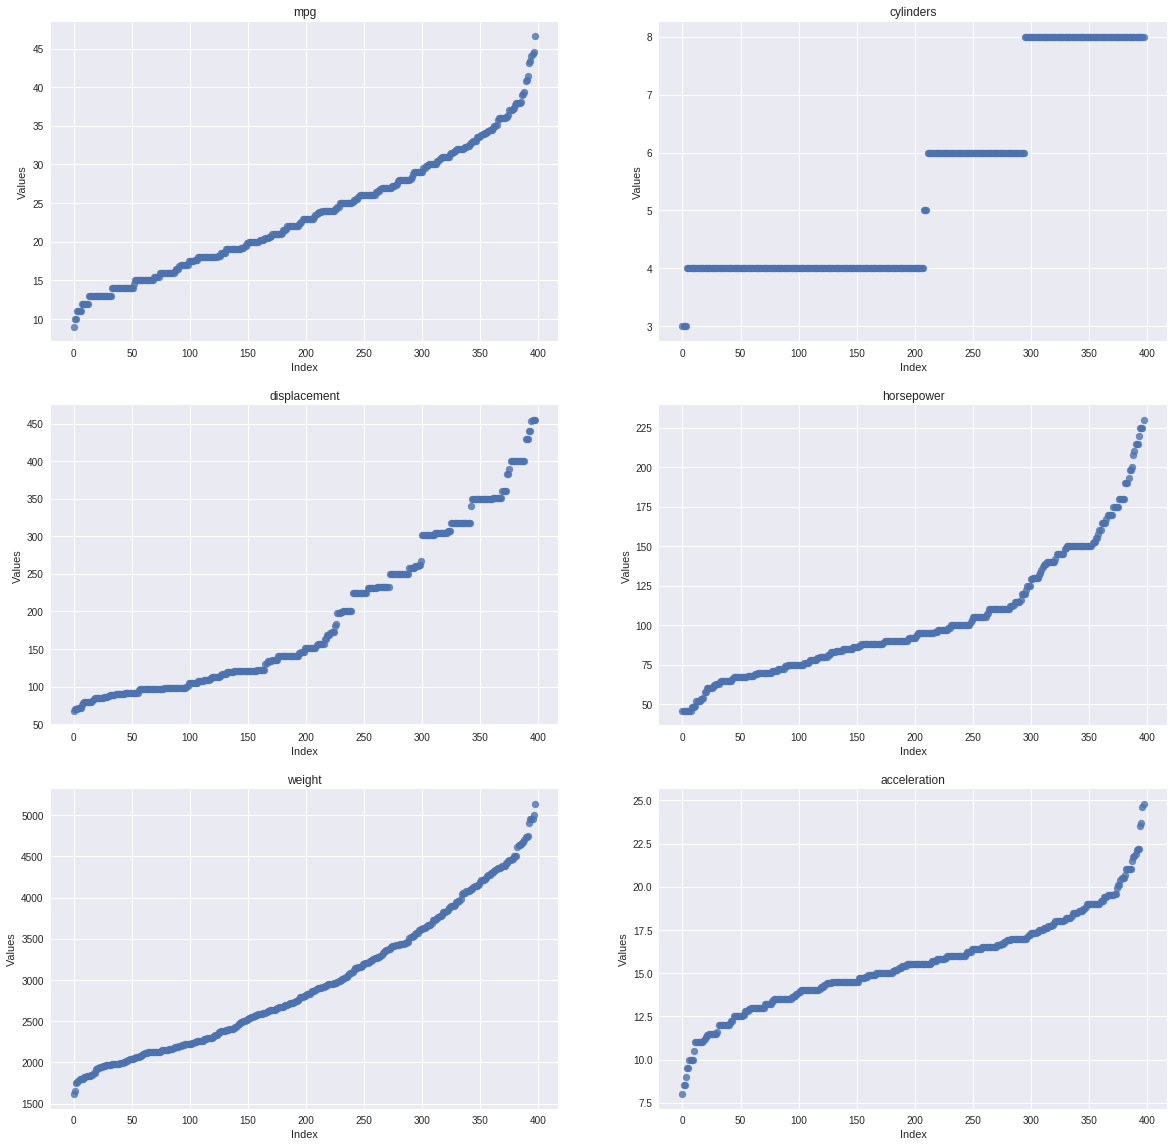

In [7]:
# Next, let's check the distribution of different columns
f, ax = plt.subplots(3,2, figsize=(20,20))
columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']

for i, col in enumerate(columns):
    ax[i//2, i%2].scatter(range(len(data)), np.sort(data[col].values), alpha=0.8)
    ax[i//2, i%2].set_xlabel('Index')
    ax[i//2, i%2].set_ylabel('Values')
    ax[i//2, i%2].set_title(col)

In [8]:
# Let's check the cars for which there are multiplr entries
from collections import defaultdict
import operator

car_map = defaultdict(int)

for car in data['car name'].values:
    car_map[car] += 1
    
car_map = dict(sorted(car_map.items(), key=operator.itemgetter(1), reverse=True))
car_map = [(k, car_map[k]) for k in car_map.keys() if car_map[k] > 1]
print(car_map)
print( " ")
print("Total number of multiple entries : ", len(car_map))

[('ford pinto', 6), ('ford maverick', 5), ('amc matador', 5), ('toyota corolla', 5), ('chevrolet impala', 4), ('amc hornet', 4), ('peugeot 504', 4), ('amc gremlin', 4), ('toyota corona', 4), ('chevrolet chevette', 4), ('ford galaxie 500', 3), ('plymouth fury iii', 3), ('pontiac catalina', 3), ('plymouth duster', 3), ('chevrolet vega', 3), ('ford gran torino', 3), ('chevrolet caprice classic', 3), ('chevrolet nova', 3), ('volkswagen dasher', 3), ('dodge colt', 3), ('honda civic', 3), ('chevrolet citation', 3), ('chevrolet chevelle malibu', 2), ('buick estate wagon (sw)', 2), ('datsun pl510', 2), ('ford country squire (sw)', 2), ('opel 1900', 2), ('toyota corolla 1200', 2), ('amc matador (sw)', 2), ('ford gran torino (sw)', 2), ('chevrolet malibu', 2), ('ford ltd', 2), ('plymouth valiant', 2), ('fiat 128', 2), ('opel manta', 2), ('audi 100ls', 2), ('saab 99le', 2), ('toyota mark ii', 2), ('chevrolet chevelle malibu classic', 2), ('datsun 710', 2), ('subaru', 2), ('buick century', 2), ('v

That's it for now. I will update it as soon as I get bored!!